In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
#df.to_csv('HousingData.csv')

df = pd.read_csv('HousingData2.csv',index_col = 0)
df.head() 

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,,,,,,,,,,,,,
0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [40]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:

from sklearn.tree import DecisionTreeRegressor

In [49]:
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [52]:
mae = mean_absolute_error(y_test,y_pred)
mae

3.0927948737044337

In [53]:
mse = mean_squared_error(y_test,y_pred)
mse

21.06020503609174

In [54]:
r2 = r2_score(y_test,y_pred)
r2

0.7173623659627728

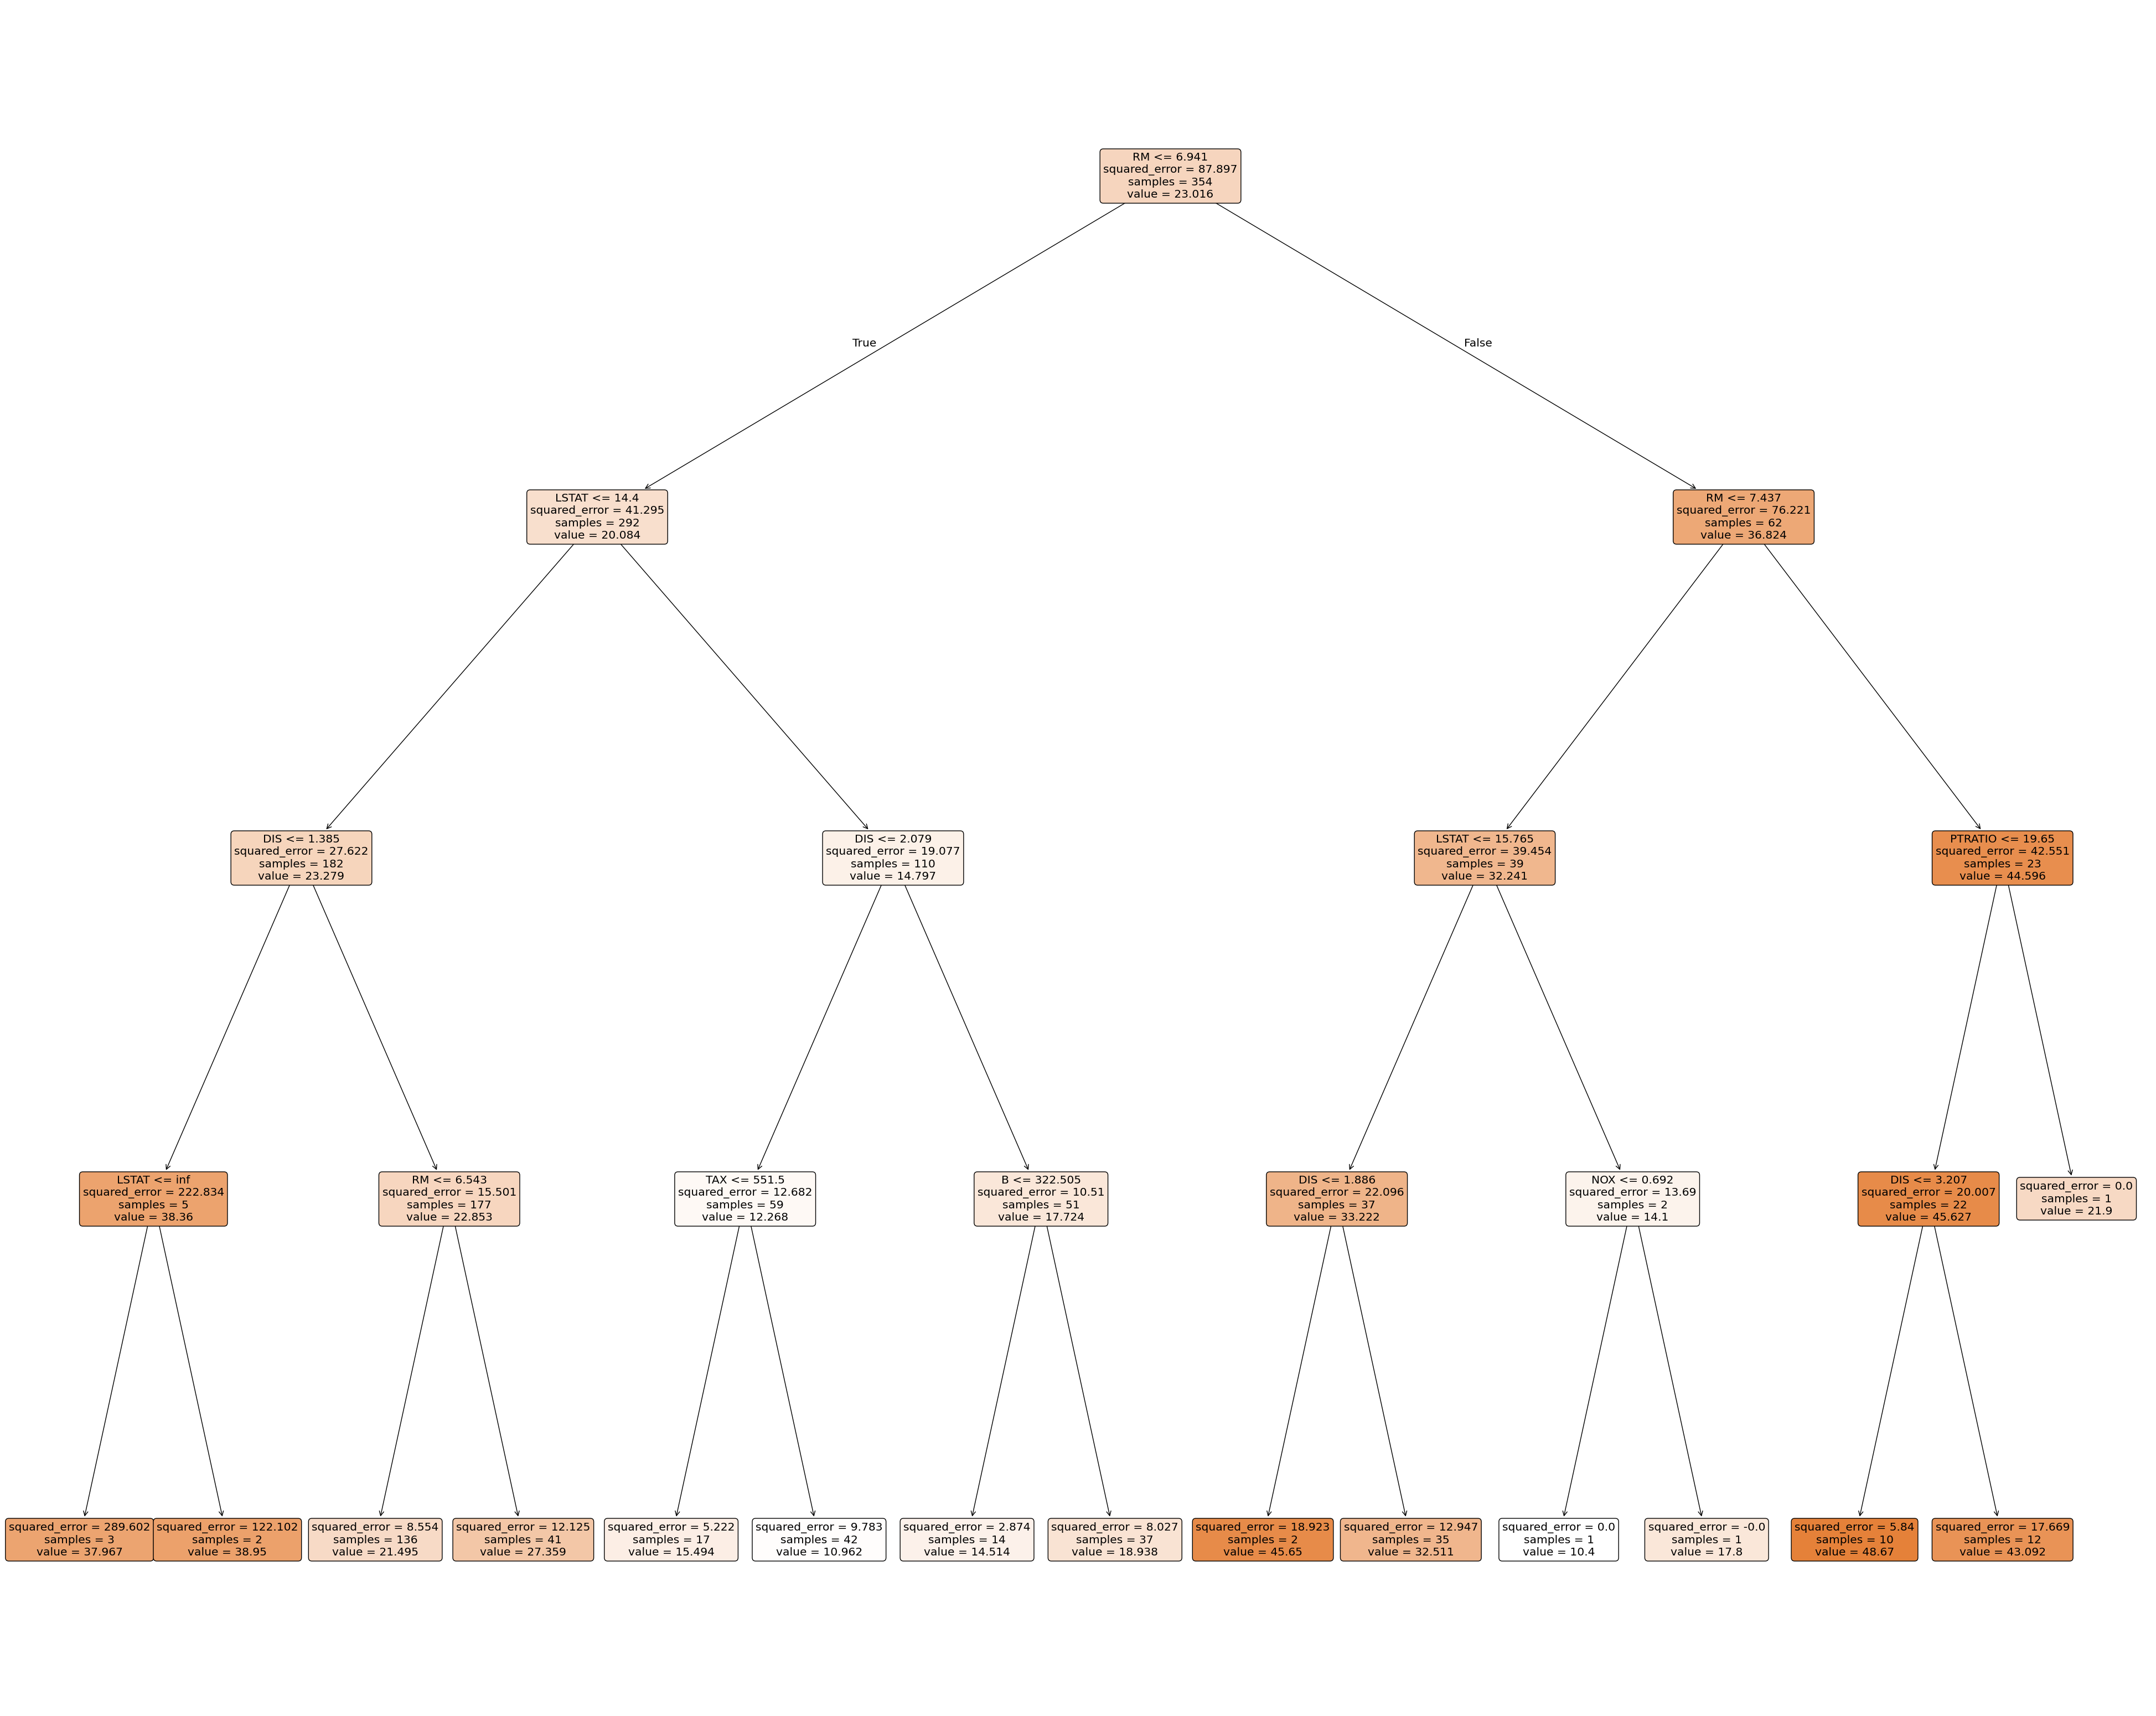

In [62]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,40))
plot_tree(model,feature_names = X.columns,filled=True,rounded=True)
plt.title=('Desicion Tree')

plt.show()

In [63]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable


<Axes: >

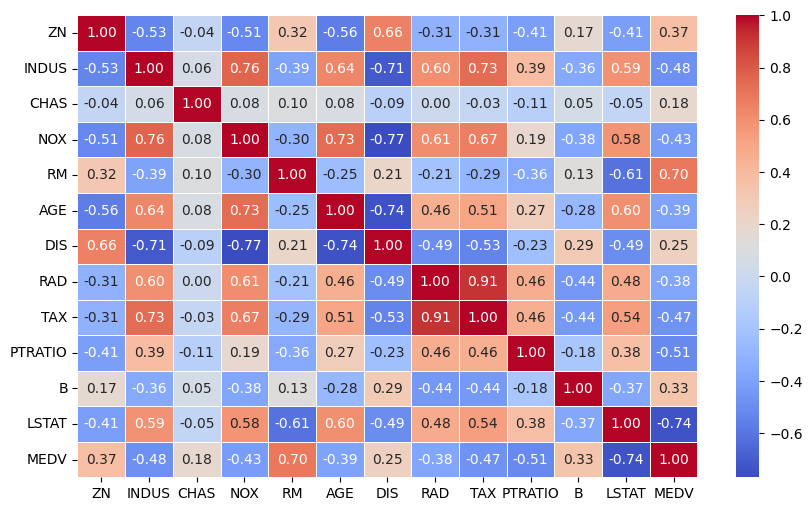

In [75]:
import seaborn as sb

plt.figure(figsize=(10,6))
sb.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm", linewidths=0.5)

In [74]:
#Random Forest
#Bir sorunun cevabını birden fazla desicion Tree e sorarak en doğru cevabı alıyor.

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
model2 = RandomForestRegressor(n_estimators=1000,random_state=42) #n_estimators=> 
#n_estimators = kaç farklı random state kullanmak istiyorsam onu giriyorum
model2.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [95]:
y_pred2 = model2.predict(X_test)

In [96]:
mea2 = mean_absolute_error(y_test,y_pred2)
mea2

2.0786828947368416

In [97]:
#Overfiting => Veriyi ezberlemek,,öğrenmek değil

In [98]:
#GridSearchCV,RandomSearchCV

In [99]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid={
    "n_estimators": list(range(5,15))
    }

In [103]:
grid =GridSearchCV(RandomForestRegressor(), param_grid ,scoring="r2")
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
             scoring='r2')

In [104]:
grid.best_params_ , grid.best_score_

({'n_estimators': 13}, np.float64(0.785210993299301))